# CREDIT RISK PREDICTION

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
#Loading the dataframe
df = pd.read_csv('credit_risk_data.csv')

In [3]:
df.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,Working,Higher education,Civil marriage,Rented apartment,Other,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,Working,Secondary / secondary special,Married,House / apartment,Security staff,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,Pensioner,Higher education,Separated,House / apartment,Other,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,Working,Higher education,Married,House / apartment,Accountants,0


In [4]:
df.shape

(9709, 20)

In [7]:
#Transforming the columns having string values to integer values using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Income_type'] = le.fit_transform(df['Income_type'])
df['Education_type'] = le.fit_transform(df['Education_type'])
df['Family_status'] = le.fit_transform(df['Family_status'])
df['Housing_type'] = le.fit_transform(df['Housing_type'])
df['Occupation_type'] = le.fit_transform(df['Occupation_type'])

In [8]:
df.head()

,ID,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,5008804,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,4,1,0,4,12,1
1,5008806,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,4,4,1,1,17,0
2,5008808,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,0,4,3,1,15,0
3,5008812,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,1,1,2,1,12,0
4,5008815,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,4,1,1,1,0,0


In [9]:
df.drop('ID', axis=1, inplace=True)

In [10]:
df.head()

,Gender,Own_car,Own_property,Work_phone,Phone,Email,Unemployed,Num_children,Num_family,Account_length,Total_income,Age,Years_employed,Income_type,Education_type,Family_status,Housing_type,Occupation_type,Target
0,1,1,1,1,0,0,0,0,2,15,427500.0,32.868574,12.435574,4,1,0,4,12,1
1,1,1,1,0,0,0,0,0,2,29,112500.0,58.793815,3.104787,4,4,1,1,17,0
2,0,0,1,0,1,1,0,0,1,4,270000.0,52.321403,8.353354,0,4,3,1,15,0
3,0,0,1,0,0,0,1,0,1,20,283500.0,61.504343,0.000000,1,1,2,1,12,0
4,1,1,1,1,1,1,0,0,2,5,270000.0,46.193967,2.105450,4,1,1,1,0,0


In [11]:
df['Target'].value_counts()

Target
0    8426
1    1283
Name: count, dtype: int64

### DATA VISUALIZATION

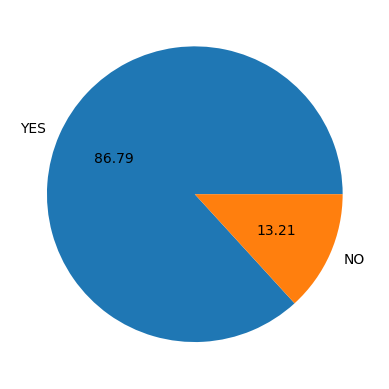

In [37]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels=['YES','NO'], autopct="%0.2f")#autopct shows us percentage
plt.show()

<Axes: xlabel='Total_income', ylabel='Age'>

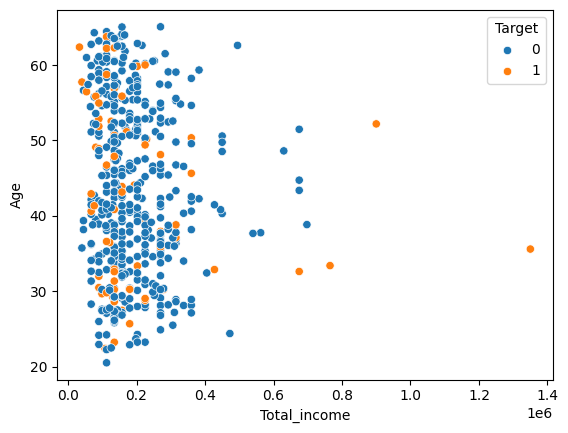

In [36]:
import seaborn as sns
sns.scatterplot(df, x=df['Total_income'].iloc[:500], y=df['Age'].iloc[:500], hue=df['Target'])

<Axes: >

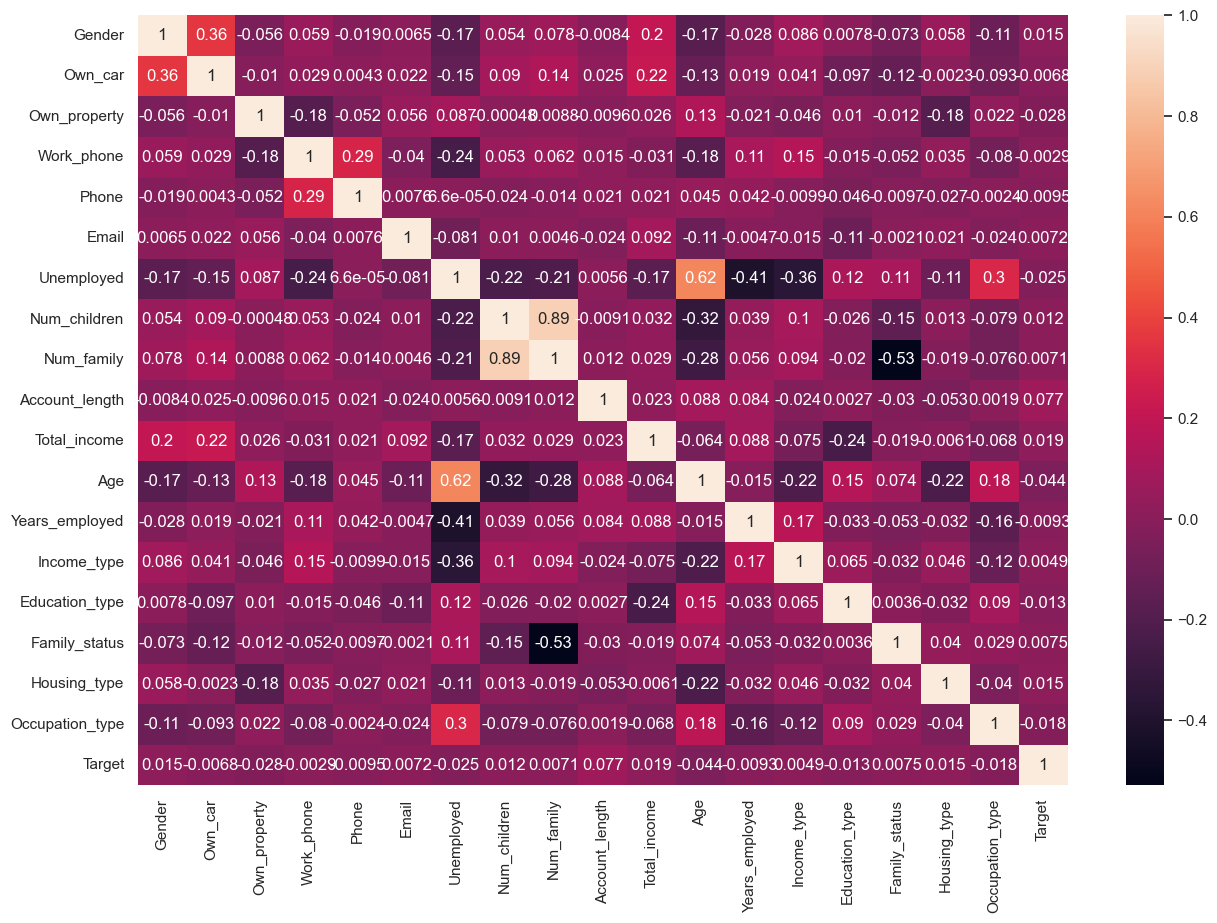

In [39]:
sns.set_theme(rc={'figure.figsize':(15,10)})
#finding correlation between features using heatmap
sns.heatmap(df.corr(), annot=True)

### SPLITTING THE DATASET INTO TRAIN AND TEST SET

In [12]:
X = df.drop('Target', axis=1)
y = df['Target']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [14]:
#Scaling the train and test datasets so that the neural networks can train them
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
X_train_scaled.shape

(7767, 18)

In [16]:
X_train_scaled

array([[-0.73266809, -0.75964191, -1.43201526, ...,  1.66516705,
        -0.29895571,  0.64173037],
       [-0.73266809, -0.75964191,  0.69831658, ...,  2.69464667,
        -0.29895571, -1.46155535],
       [ 1.36487451, -0.75964191, -1.43201526, ..., -0.39379219,
        -0.29895571, -1.46155535],
       ...,
       [ 1.36487451,  1.31640972,  0.69831658, ..., -0.39379219,
        -0.29895571,  0.64173037],
       [-0.73266809, -0.75964191, -1.43201526, ..., -1.42327181,
        -0.29895571, -1.46155535],
       [-0.73266809, -0.75964191,  0.69831658, ..., -0.39379219,
        -0.29895571,  0.40803195]])

### MODEL TRAINING USING NEURAL NETWORKS(2 hidden layers are there)

In [17]:
model = Sequential()

model.add(Dense(18, activation='relu', input_dim=18))
model.add(Dense(18, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\srija\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 18)             │           342 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 18)             │           342 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            19 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 703 (2.75 KB)

 Trainable params: 703 (2.75 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
history = model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7913 - loss: 0.4978
Epoch 2/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8708 - loss: 0.3911
Epoch 3/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8740 - loss: 0.3804
Epoch 4/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8719 - loss: 0.3767
Epoch 5/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.8697 - loss: 0.3831
Epoch 6/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8715 - loss: 0.3769
Epoch 7/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8721 - loss: 0.3745
Epoch 8/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8715 - loss: 0.3751
Epoch 9/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8719 - loss: 0.3704
Epoch 10/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8672 - loss: 0.3788


### MODEL EVALUATION(ACCURACY - 87.02%)

In [21]:
max_values = {}
for key, value in history.history.items():
    max_values[key] = max(value)

print(max_values)

{'accuracy': 0.8702201843261719, 'loss': 0.43503010272979736}


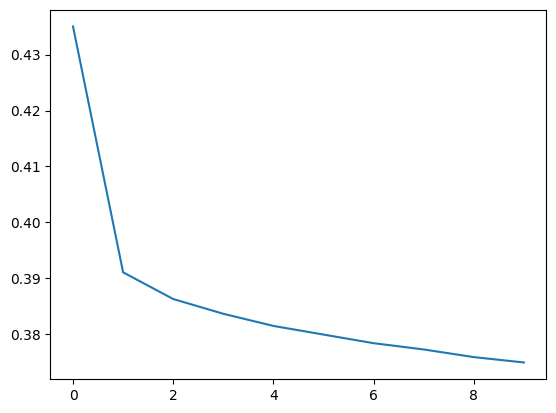

In [22]:
plt.plot(history.history['loss'])

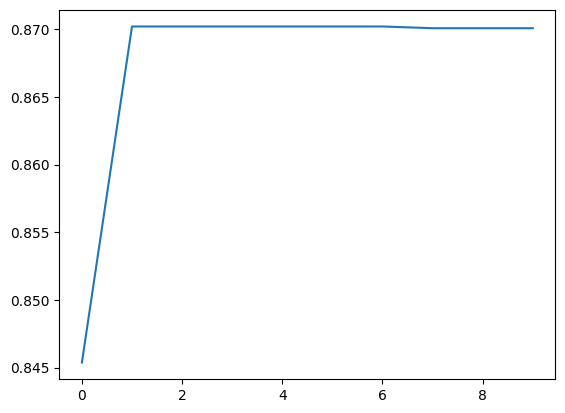

In [23]:
plt.plot(history.history['accuracy'])